In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
melb = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [5]:
melb['Suburb'][60000]

'Sunbury'

In [14]:
melb.loc[0:10,['Suburb', 'Address', 'Type', 'Price']]

,Suburb,Address,Type,Price
0,Abbotsford,49 Lithgow St,h,1490000.0
1,Abbotsford,59A Turner St,h,1220000.0
2,Abbotsford,119B Yarra St,h,1420000.0
3,Aberfeldie,68 Vida St,h,1515000.0
4,Airport West,92 Clydesdale Rd,h,670000.0
5,Airport West,4/32 Earl St,t,530000.0
6,Airport West,3/74 Hawker St,u,540000.0
7,Airport West,1/26 Highridge Cr,h,715000.0
8,Albanvale,1 Jackson Cct,h,NaN
9,Albert Park,18 Mills St,h,1925000.0


In [16]:
melb.loc[0,'Suburb']

'Abbotsford'

In [17]:
melb.iloc[0:10,[0,1,3,4]]

,Suburb,Address,Type,Price
0,Abbotsford,49 Lithgow St,h,1490000.0
1,Abbotsford,59A Turner St,h,1220000.0
2,Abbotsford,119B Yarra St,h,1420000.0
3,Aberfeldie,68 Vida St,h,1515000.0
4,Airport West,92 Clydesdale Rd,h,670000.0
5,Airport West,4/32 Earl St,t,530000.0
6,Airport West,3/74 Hawker St,u,540000.0
7,Airport West,1/26 Highridge Cr,h,715000.0
8,Albanvale,1 Jackson Cct,h,NaN
9,Albert Park,18 Mills St,h,1925000.0


In [18]:
melb.iloc[0:10,0:4]

,Suburb,Address,Rooms,Type
0,Abbotsford,49 Lithgow St,3,h
1,Abbotsford,59A Turner St,3,h
2,Abbotsford,119B Yarra St,3,h
3,Aberfeldie,68 Vida St,3,h
4,Airport West,92 Clydesdale Rd,2,h
5,Airport West,4/32 Earl St,2,t
6,Airport West,3/74 Hawker St,2,u
7,Airport West,1/26 Highridge Cr,3,h
8,Albanvale,1 Jackson Cct,6,h
9,Albert Park,18 Mills St,3,h


In [19]:
melb.Price.describe()

count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64

## Standard Deviation And Variance

## Population
__Variance Formula__

$\displaystyle s^{2}=\frac{\sum(x-\mu)^2}{n}$

__Standard Deviation__

$\displaystyle s=\sqrt{\frac{\sum(x-\mu)^2}{n}}$

## Sample

__Variance Formula__

$\displaystyle s^{2}=\frac{\sum(x-\mu)^2}{n-1}$

__Standard Deviation Formula__

$\displaystyle s=\sqrt{\frac{\sum(x-\mu)^2}{n-1}}$


In [21]:
melb.Price.head()

0    1490000.0
1    1220000.0
2    1420000.0
3    1515000.0
4     670000.0
Name: Price, dtype: float64

In [24]:
melb.drop(melb[melb['Price'].isna() == True].index, axis=0, inplace=True)

In [26]:
def Variance(array):
    mean = sum(array) / len(array)
    
    distance = []
    for value in array:
        squared_distance = (value - mean)**2
        distance.append(squared_distance)
        
    return sum(distance) / len(distance)

print(f'{Variance(melb.Price):,}')

352,233,694,151.1784


In [33]:
from math import sqrt 
def standard_dev(array):
    mean = sum(array) / len(array)
    
    distance = []
    for value in array:
        squared_distance = (value - mean)**2
        distance.append(squared_distance)
    variance = sum(distance) / len(distance)
    
    return sqrt(variance)

print(f'{standard_dev(melb.Price):,}')

593,492.7919959757


In [29]:
np.std(melb.Price)

593492.7919959757

In [30]:
def Variance_bes(array):
    mean = sum(array) / len(array)
    
    distance = []
    for value in array:
        squared_distance = (value - mean)**2
        distance.append(squared_distance)
        
    return sum(distance) / (len(distance)-1)

In [32]:
def standard_dev_bes(array):
    mean = sum(array) / len(array)
    
    distance = []
    for value in array:
        squared_distance = (value - mean)**2
        distance.append(squared_distance)
    variance = sum(distance) / (len(distance)-1)
    
    return sqrt(variance)

In [36]:
print(f'{Variance(melb.Price):,}')
print(f'{Variance_bes(melb.Price):,}')

352,233,694,151.1784
352,240,966,898.4148


In [37]:
print(f'{standard_dev(melb.Price):,}')
print(f'{standard_dev_bes(melb.Price):,}')

593,492.7919959757
593,498.9190372757


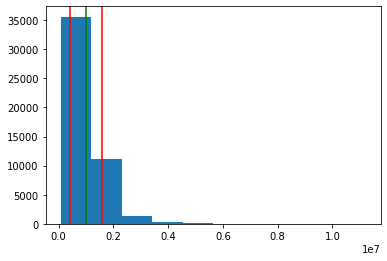

In [42]:
plt.hist(melb.Price)
plt.axvline(melb.Price.mean(), color='green')
plt.axvline(melb.Price.mean()+standard_dev_bes(melb.Price), color='red')
plt.axvline(melb.Price.mean()-standard_dev_bes(melb.Price), color='red')
plt.show()

In [43]:
melb.Price.mean()+standard_dev_bes(melb.Price)

1591397.160525517

In [44]:
melb.Price.mean()-standard_dev_bes(melb.Price)

404399.32245096576

In [48]:
# std numpy asumsinya menggunakan populasi
# std numpy ddof default = 0
np.std(melb.Price, ddof=1)

593498.9190372757

In [49]:
# std pandas asumsinya menggunakan sample
# std pandas ddof default = 1
melb.Price.std(ddof=1)

593498.9190372757

In [53]:
data = [2,3,4,5,6,7,8,9]
mean = np.mean(data)
mean

5.5

In [ ]:
# variance= rata-rata variasi data
def Variance(array):
    mean = sum(array) / len(array)
    
    distance = []
    for value in array:
        squared_distance = (value - mean)**2
        distance.append(squared_distance)
        
    return sum(distance) / len(distance)

## Review Modul 2

In [54]:
df = pd.DataFrame({'A':[10,11,12], 'B':[13,14,15]})
df

,A,B
0,10,13
1,11,14
2,12,15


In [56]:
data = [
    [10,13],
    [11,14],
    [12,15]
]
df2 = pd.DataFrame(data, columns='A B'.split())
df2

,A,B
0,10,13
1,11,14
2,12,15


In [57]:
s = pd.Series([1,2,3,4,5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [58]:
s_ind = pd.Series([1,2,3,4,5], index='a b c d e'.split())
s_ind

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [59]:
ser1 = pd.Series([1,2,3,4], index='USA Germany USSR Japan'.split())
ser2 = pd.Series([3,4,5,6], index='USA Germany USSR Japan'.split())

ser1 + ser2

USA         4
Germany     6
USSR        8
Japan      10
dtype: int64

In [60]:
ser1.values

array([1, 2, 3, 4], dtype=int64)

In [61]:
ser1.index

Index(['USA', 'Germany', 'USSR', 'Japan'], dtype='object')

In [74]:
df3 = pd.DataFrame(randn(5,4), index=list('ABCDE'), columns=list('WXYZ'))
df3 = pd.concat([df3, df3.loc[['E']]])
df3

,W,X,Y,Z
A,-0.306041,1.196655,-1.447226,-0.672166
B,-0.487533,0.100622,0.285576,0.163593
C,0.670964,-0.409405,0.975168,-0.008055
D,-0.285327,0.458224,-0.462073,0.371822
E,-0.545772,0.729842,0.922586,1.399643
E,-0.545772,0.729842,0.922586,1.399643


In [69]:
df3['W']

A    0.540486
B   -0.608829
C   -1.118511
D   -3.035434
E    0.412848
Name: W, dtype: float64

In [70]:
df3[['W', 'X', 'Y']]

,W,X,Y
A,0.540486,1.492643,-0.356651
B,-0.608829,-1.578274,0.649153
C,-1.118511,0.721225,-0.889003
D,-3.035434,1.671550,0.343369
E,0.412848,0.249470,-0.545387


In [72]:
df3.W

A    0.540486
B   -0.608829
C   -1.118511
D   -3.035434
E    0.412848
Name: W, dtype: float64

## Creating New Column

In [76]:
df3['ZZ'] = [1,2,3,4,5,6]
df3

,W,X,Y,Z,ZZ
A,-0.306041,1.196655,-1.447226,-0.672166,1
B,-0.487533,0.100622,0.285576,0.163593,2
C,0.670964,-0.409405,0.975168,-0.008055,3
D,-0.285327,0.458224,-0.462073,0.371822,4
E,-0.545772,0.729842,0.922586,1.399643,5
E,-0.545772,0.729842,0.922586,1.399643,6


In [77]:
df3.drop('E', axis=0)

,W,X,Y,Z,ZZ
A,-0.306041,1.196655,-1.447226,-0.672166,1
B,-0.487533,0.100622,0.285576,0.163593,2
C,0.670964,-0.409405,0.975168,-0.008055,3
D,-0.285327,0.458224,-0.462073,0.371822,4


In [79]:
df3.loc[['A','B'],['W','X']]

,W,X
A,-0.306041,1.196655
B,-0.487533,0.100622


In [81]:
df3.iloc[0:3,0:2]

,W,X
A,-0.306041,1.196655
B,-0.487533,0.100622
C,0.670964,-0.409405


## Conditional Selection

In [82]:
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [83]:
melb[melb['Rooms'] < 3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
12,Alphington,55 Fulham Rd,2,h,1675000.0,S,Miles,1/04/2017,3078,Northern Metropolitan,2211,5.7,Darebin City Council
14,Altona,9 Delmont Av,2,h,860000.0,SP,Barlow,1/04/2017,3018,Western Metropolitan,5301,11.0,Hobsons Bay City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63007,Yarraville,2/13 Stephen St,2,u,410000.0,SP,Sweeney,30/12/2017,3013,Western Metropolitan,6543,6.3,Maribyrnong City Council
63012,Frankston,5/33 Dandenong East Rd,2,u,375000.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63014,Frankston,1/34 Petrie St,2,u,345000.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63015,Frankston,3/34 Petrie St,2,u,340000.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council


In [84]:
melb[~melb['Rooms'] < 3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,Northern Metropolitan,14577,8.4,Darebin City Council
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council


In [85]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


In [86]:
melb.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


In [88]:
byregion = melb.groupby('Regionname')

In [90]:
melb.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria',
       'Western Victoria'], dtype=object)

In [93]:
melb.Regionname.value_counts(normalize=True)*100

Northern Metropolitan         28.075899
Southern Metropolitan         25.910020
Western Metropolitan          19.986373
Eastern Metropolitan          15.660810
South-Eastern Metropolitan     8.279479
Northern Victoria              0.939442
Eastern Victoria               0.772201
Western Victoria               0.375777
Name: Regionname, dtype: float64

In [95]:
byregion.get_group('Northern Metropolitan')[['Suburb', 'Address']]

,Suburb,Address
0,Abbotsford,49 Lithgow St
1,Abbotsford,59A Turner St
2,Abbotsford,119B Yarra St
12,Alphington,55 Fulham Rd
13,Alphington,41 Toolangi Rd
...,...,...
63003,Yallambie,8/6 Borlase St
63017,Preston,229 Murray Rd
63018,Roxburgh Park,3 Carr Pl
63019,Roxburgh Park,9 Parker Ct


In [96]:
byregion.mean()

,Rooms,Price,Postcode,Propertycount,Distance
Regionname,,,,,
Eastern Metropolitan,3.406856,1.071837e+06,3122.016875,6754.685036,15.328187
Eastern Victoria,3.550802,6.893688e+05,3511.641711,9204.593583,33.895989
Northern Metropolitan,2.898220,8.237198e+05,3096.762833,9421.671864,10.626761
Northern Victoria,3.542857,6.430822e+05,3454.698901,4418.870330,32.987692
South-Eastern Metropolitan,3.243142,8.462352e+05,3220.415212,6768.067082,24.403691
Southern Metropolitan,2.918719,1.373222e+06,3159.617499,7403.053231,9.131501
Western Metropolitan,3.135434,8.005163e+05,3039.208781,6288.747624,11.229267
Western Victoria,3.274725,4.120261e+05,3337.796703,4089.131868,30.934066


In [97]:
byregion.sum()

,Rooms,Price,Postcode,Propertycount,Distance
Regionname,,,,,
Eastern Metropolitan,25841,8.129887e+09,23680498,51234286,116264.3
Eastern Victoria,1328,2.578239e+08,1313354,3442518,12677.1
Northern Metropolitan,39410,1.120094e+10,42109781,128115894,144502.7
Northern Victoria,1612,2.926024e+08,1571888,2010586,15009.4
South-Eastern Metropolitan,13005,3.393403e+09,12913865,27139949,97858.8
Southern Metropolitan,36627,1.723256e+10,39650040,92900915,114591.2
Western Metropolitan,30351,7.748998e+09,29419541,60875077,108699.3
Western Victoria,596,7.498875e+07,607479,744222,5630.0


In [98]:
melb.set_index('Regionname')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Propertycount,Distance,CouncilArea
Regionname,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,4019,3.0,Yarra City Council
Northern Metropolitan,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,4019,3.0,Yarra City Council
Northern Metropolitan,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,4019,3.0,Yarra City Council
Western Metropolitan,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,1543,7.5,Moonee Valley City Council
Western Metropolitan,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...
South-Eastern Metropolitan,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,31/03/2018,3199,17055,38.0,Frankston City Council
Northern Metropolitan,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,14577,8.4,Darebin City Council
Northern Metropolitan,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,5833,20.6,Hume City Council


In [100]:
melb.sample(100)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
53429,Truganina,9/438 Morris Rd,3,t,265000.0,SP,Sweeney,26/07/2016,3029,Western Metropolitan,5811,18.4,Melton City Council
33053,Maidstone,11/44 Eucalyptus Dr,2,u,420000.0,SP,Biggin,17/03/2018,3012,Western Metropolitan,3873,6.4,Maribyrnong City Council
46330,Gowanbrae,7 Mirrim Pl,4,h,1260000.0,PI,Nelson,23/12/2017,3043,Western Metropolitan,1071,12.9,Moreland City Council
14015,Blackburn,5/10 Frankcom St,3,u,870000.0,S,Fletchers,8/04/2017,3130,Eastern Metropolitan,5713,13.4,Whitehorse City Council
46931,Bundoora,6 Greenwich Cr,3,t,628000.0,S,Ray,24/02/2018,3083,Northern Metropolitan,10175,12.1,Banyule City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30448,Vermont South,22 Myriong Av,4,h,1480000.0,S,M.J,16/07/2016,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council
39402,Taylors Lakes,25 Fastnet Dr,3,h,685000.0,S,Barry,19/11/2016,3038,Western Metropolitan,5336,15.5,Brimbank City Council
6299,Hawthorn East,10 Neave St,2,h,3350000.0,S,hockingstuart,4/03/2017,3123,Southern Metropolitan,6482,6.2,Boroondara City Council
57766,Preston,91 Plenty Rd,3,h,800000.0,PI,hockingstuart,28/05/2016,3072,Northern Metropolitan,14577,8.4,Darebin City Council


## Missing Data

In [101]:
melb2 = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
melb2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [102]:
melb2.isna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,False,False,False,False,False,False,False,False,False,False,False,False,False
63019,False,False,False,False,False,False,False,False,False,False,False,False,False
63020,False,False,False,False,False,False,False,False,False,False,False,False,False
63021,False,False,False,False,True,False,False,False,False,False,False,False,False


In [103]:
melb2.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Postcode         False
Regionname       False
Propertycount    False
Distance         False
CouncilArea      False
dtype: bool

In [104]:
True and False

False

In [105]:
True or False

True

In [106]:
True and True

True

In [107]:
False and False

False

In [109]:
melb2.drop(melb2[melb2.Price.isna() == True].index, axis=0)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,Northern Metropolitan,14577,8.4,Darebin City Council
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council


In [111]:
melb2.dropna(axis=1)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [113]:
melb2.fillna(melb2.Price.mean())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1.490000e+06,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1.220000e+06,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1.420000e+06,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1.515000e+06,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,6.700000e+05,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,5.660000e+05,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,5.000000e+05,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,5.450000e+05,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,9.978982e+05,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [114]:
# method ffill = mengisi nan values dengan melihat value yg sebelum / dari atas ke bawah
# method bfill = mengisi nan values dengan melihat value setelahnya / dari bawah ke atas
melb2.fillna(method='ffill')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,545000.0,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


## Merging

In [115]:
df1 = pd.DataFrame({'A': ['A{}'.format(i) for i in range(4)],
                    'B': ['B{}'.format(i) for i in range(4)],
                    'C': ['C{}'.format(i) for i in range(4)],
                    'D': ['D{}'.format(i) for i in range(4)]
                   }, index = [i for i in range(4)]
                  )

df2 = pd.DataFrame({'A': ['A{}'.format(i) for i in range(4,8)],
                    'B': ['B{}'.format(i) for i in range(4,8)],
                    'C': ['C{}'.format(i) for i in range(4,8)],
                    'D': ['D{}'.format(i) for i in range(4,8)]
                   }, index = [i for i in range(4)]
                  )

df3 = pd.DataFrame({'A': ['A{}'.format(i) for i in range(8,12)],
                    'B': ['B{}'.format(i) for i in range(8,12)],
                    'C': ['C{}'.format(i) for i in range(8,12)],
                    'D': ['D{}'.format(i) for i in range(8,12)]
                   }, index = [i for i in range(4)]
                  )

In [116]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [117]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [118]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [119]:
df1
df2
df3

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


,A,B,C,D
0,A8,B8,C8,D8
1,A9,B9,C9,D9
2,A10,B10,C10,D10
3,A11,B11,C11,D11


In [122]:
pd.concat([df1,df2,df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


In [123]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                    'A': ['A{}'.format(i) for i in range(4)],
                    'B': ['B{}'.format(i) for i in range(4)]})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                    'C': ['C{}'.format(i) for i in range(4)],
                    'D': ['D{}'.format(i) for i in range(4)]})

In [124]:
left
right

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [125]:
pd.merge(left, right,on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


## Selection

In [126]:
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [128]:
melb[(melb.Rooms==3)&(melb.Regionname=='Northern Metropolitan')]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
92,Broadmeadows,145 Graham St,3,h,457000.0,S,YPA,1/04/2017,3047,Northern Metropolitan,4294,14.0,Hume City Council
96,Brunswick,2 Cassels Rd,3,h,900000.0,SP,hockingstuart,1/04/2017,3056,Northern Metropolitan,11918,5.2,Moreland City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63003,Yallambie,8/6 Borlase St,3,t,655000.0,S,Buckingham,30/12/2017,3085,Northern Metropolitan,1369,12.7,Banyule City Council
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,Northern Metropolitan,14577,8.4,Darebin City Council
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council


## New Columns Using Function

In [137]:
def times2(x):
    return x*2

In [129]:
melb['Price times 2'] = melb['Price'].apply(lambda x: x*2)
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price times 2
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2980000.0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2440000.0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2840000.0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,3030000.0
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,1340000.0


In [131]:
melb['Rooms times 2'] = melb['Rooms'].apply(times2)
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price times 2,Rooms times 2
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2980000.0,6
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2440000.0,6
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2840000.0,6
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,3030000.0,6
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,1340000.0,4


## Pivot

In [136]:
melb.pivot_table(index='Method', columns='SellerG', values='Price')

SellerG,@Realty,A,AIME,ASL,Abercromby's,Abley,Ace,Airport,Alex,Alexkarbon,...,hockingstuart/Marshall,hockingstuart/Sweeney,hockingstuart/Village,hockingstuart/hockingstuart,iHomes,iOne,iProperty,iSell,iTRAK,voglwalpole
Method,,,,,,,,,,,,,,,,,,,,,
PI,989285.714286,810000.0,980000.0,NaN,2.476429e+06,NaN,NaN,NaN,680000.0,6.803333e+05,...,NaN,800000.0,NaN,580666.666667,NaN,NaN,NaN,693100.000000,793333.333333,NaN
S,580227.272727,688500.0,NaN,1087500.0,2.394143e+06,750250.0,475000.0,1035000.0,1100000.0,9.377296e+05,...,NaN,NaN,345000.0,735177.083333,1094875.0,NaN,NaN,729594.936709,730990.740741,563000.0
SA,NaN,NaN,NaN,NaN,1.432500e+06,NaN,NaN,NaN,NaN,1.765500e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP,NaN,795000.0,NaN,1250000.0,1.124000e+06,NaN,737500.0,NaN,NaN,8.077185e+05,...,NaN,NaN,NaN,563000.000000,NaN,NaN,820000.0,646166.666667,725772.222222,970000.0
VB,806666.666667,NaN,NaN,NaN,2.046429e+06,NaN,NaN,NaN,500000.0,7.950000e+05,...,2100000.0,NaN,NaN,713333.333333,950000.0,620000.0,NaN,710000.000000,640000.000000,NaN


## Visualization

In [138]:
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price times 2,Rooms times 2
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2980000.0,6
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2440000.0,6
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2840000.0,6
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,3030000.0,6
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,1340000.0,4


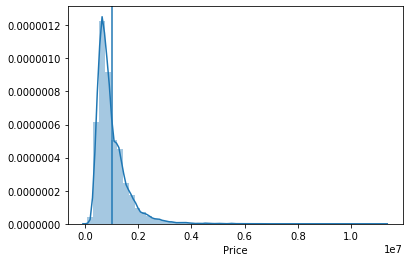

In [140]:
sns.distplot(melb.Price)
plt.axvline(melb.Price.mean())

In [145]:
corr_dist = melb[['Distance', 'Price']].corr()
corr_dist

,Distance,Price
Distance,1.000000,-0.253668
Price,-0.253668,1.000000


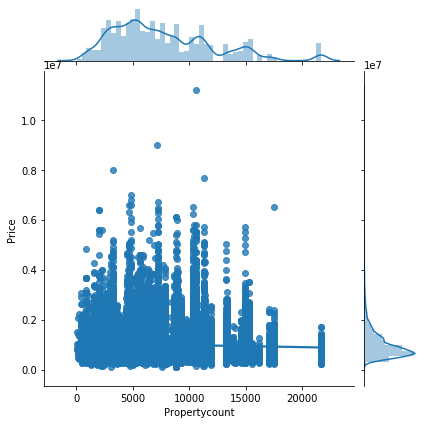

In [144]:
sns.jointplot(x=melb['Distance'], y=melb['Price'], kind='reg')

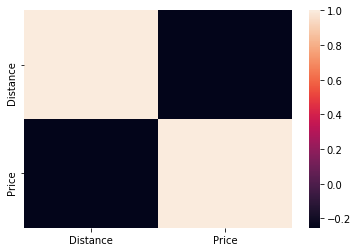

In [147]:
sns.heatmap(corr_dist)

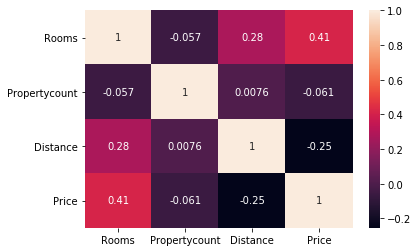

In [150]:
sns.heatmap(melb[['Rooms', 'Propertycount', 'Distance', 'Price']].corr(), annot=True)

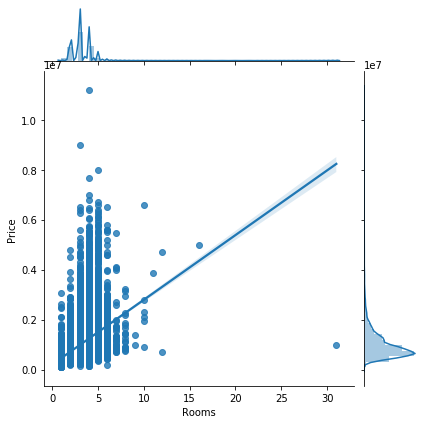

In [151]:
sns.jointplot(x=melb['Rooms'], y=melb['Price'], kind='reg')

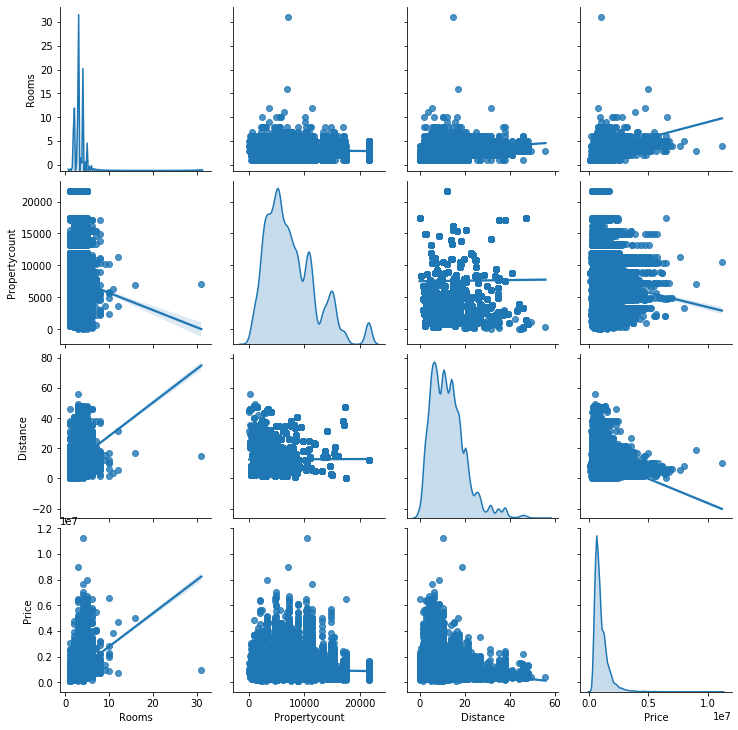

In [153]:
sns.pairplot(melb[['Rooms', 'Propertycount', 'Distance', 'Price']], palette='colorblind', kind='reg', diag_kind='kde')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

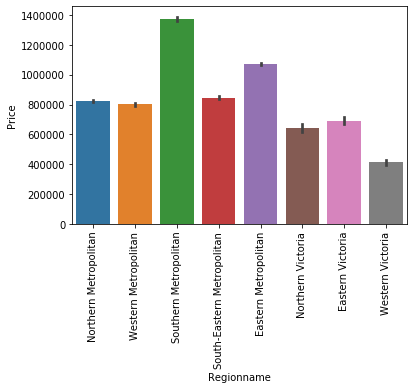

In [157]:
sns.barplot(x='Regionname', y='Price', data=melb)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

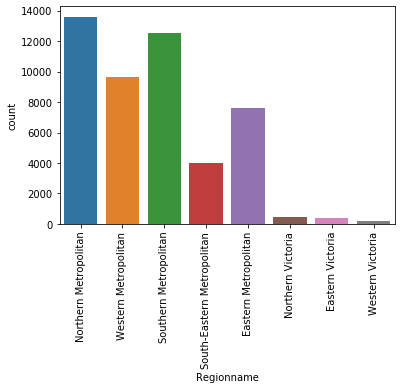

In [159]:
sns.countplot(x='Regionname', data=melb)
plt.xticks(rotation=90)

<Figure size 1152x720 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

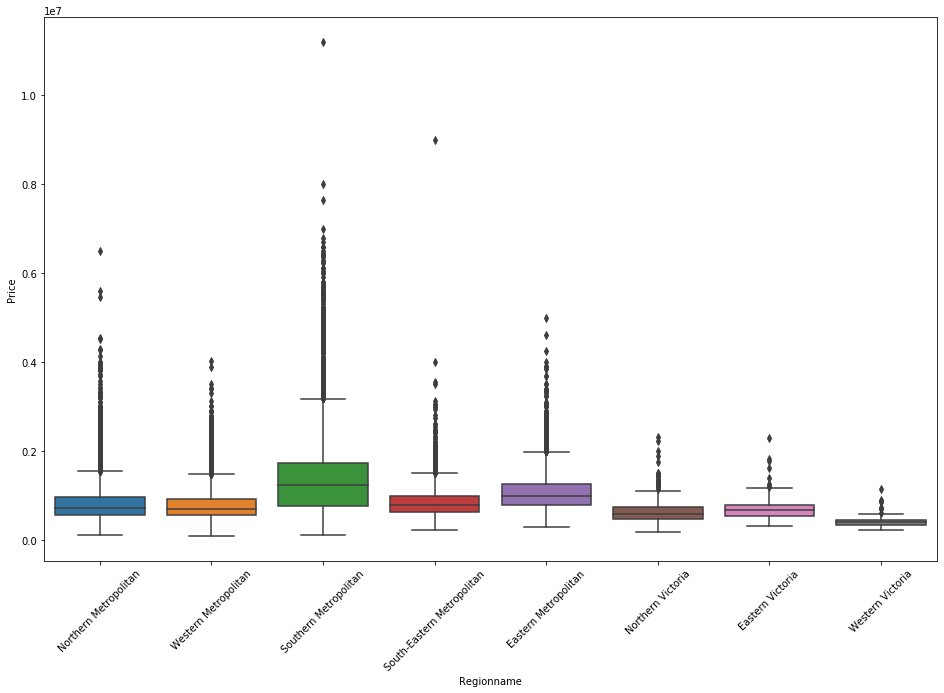

In [162]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Regionname', y='Price', data=melb)
plt.xticks(rotation=45)

<Figure size 1152x720 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

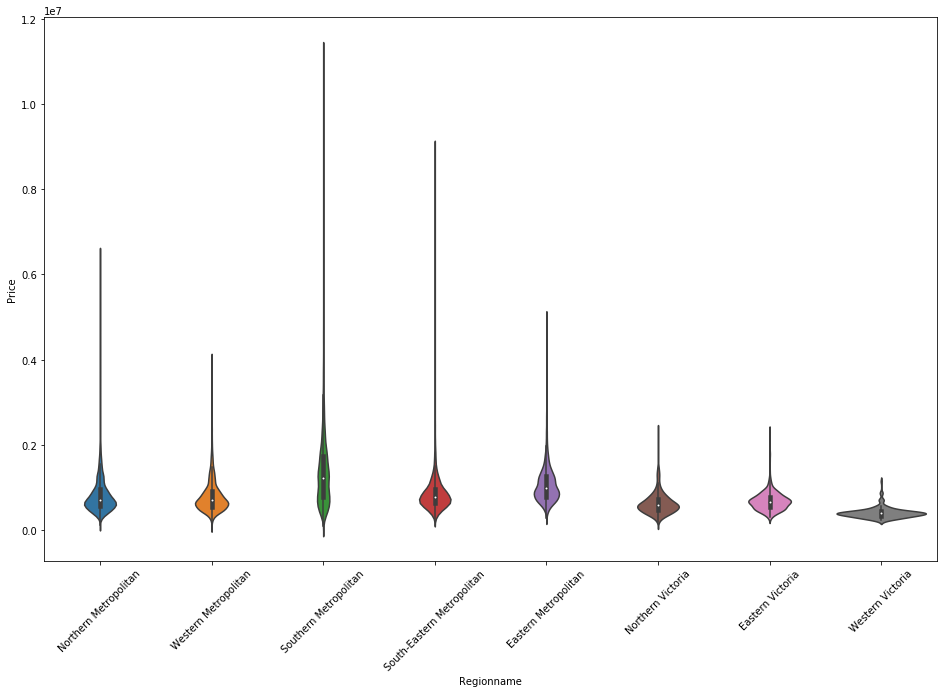

In [163]:
plt.figure(figsize=(16,10))
sns.violinplot(x='Regionname', y='Price', data=melb)
plt.xticks(rotation=45)

In [164]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


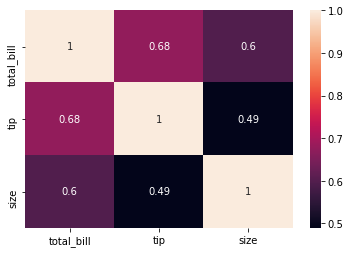

In [165]:
sns.heatmap(tips.corr(), annot=True)

In [166]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [167]:
pvflights = flights.pivot_table(values='passengers', index='month', columns='year')
pvflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


<Figure size 1152x720 with 0 Axes>

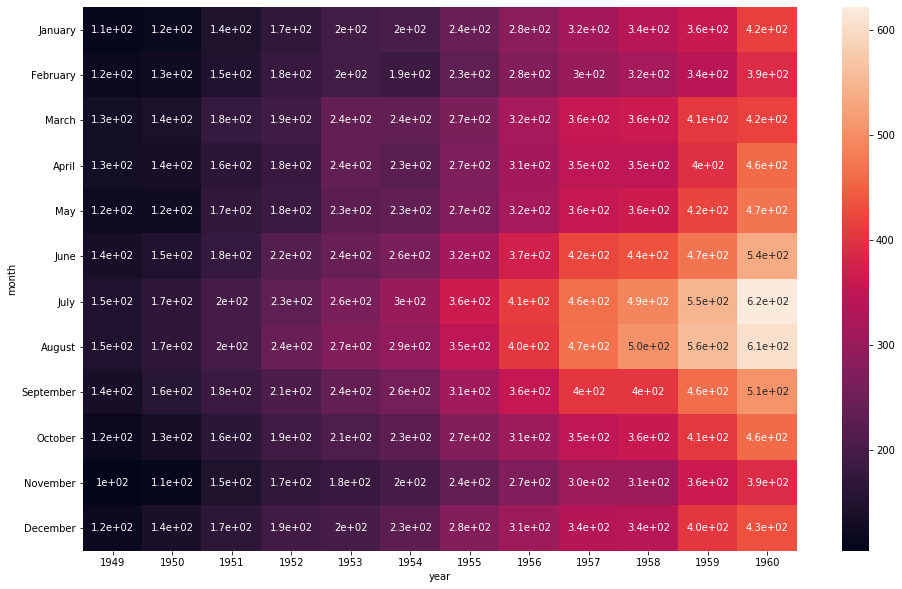

In [169]:
plt.figure(figsize=(16,10))
sns.heatmap(pvflights, annot=True)

In [171]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


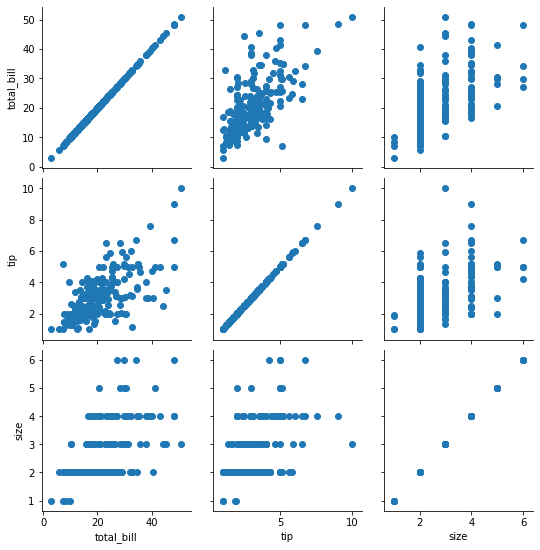

In [170]:
g = sns.PairGrid(tips)
g.map(plt.scatter)

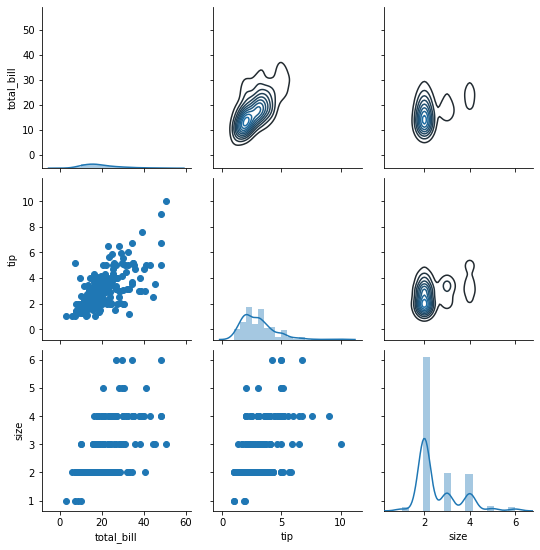

In [173]:
g = sns.PairGrid(tips)
g.map_diag(sns.distplot)
g.map_upper(sns.kdeplot)
g.map_lower(plt.scatter)

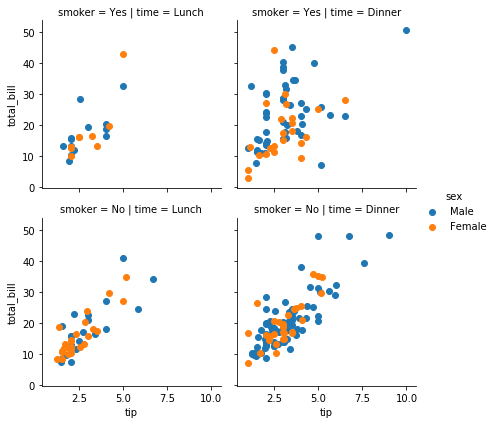

In [175]:
f = sns.FacetGrid(data=tips, col='time', row='smoker', hue='sex')
f.map(plt.scatter, 'tip', 'total_bill').add_legend()

kisi-kisi
mysql
mengambil data mysql > pandas
processing data
visualisasi data
asumsi